In [1]:
%matplotlib notebook

import os
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st


# This notebook is intended for the case in which we decide to analyze correlations to life expectancy

# ESTABLISH PATHS

# Probability (%) of dying between age 30 and exact age 70 from cardiovascular disease, cancer, diabetes, or chronic respiratory disease
cancer_etc_path = "./data/good_data/30-70cancerChdEtc.csv"
# could also analyze healthy life expectancy at birth (?) instead of cancer etc.
hale_birth_path = "./data/good_data/HALElifeExpectancyAtBirth.csv"

# Primary reliance on clean fuels and technologies
cleantech_path = "./data/good_data/cleanFuelAndTech.csv"

# Alcohol per capita (15+)
alcohol_path = "./data/good_data/alcoholSubstanceAbuse.csv"

# Medical doctors (per 10,000 people)
doctors_path = "./data/good_data/medicalDoctors.csv"

# Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older
tobacco_path = "./data/good_data/tobaccoAge15.csv"


In [2]:
# CONVERT TO DATA FRAMES

# Healthy life expectancy (HALE) at birth
hale_birth_df = pd.read_csv(hale_birth_path, encoding = "utf-8")

# Probability (%) of dying between 30 and 70 of cancer, cardiovascular disease, diabetes or chronic respiratory disease
cancer_etc_df = pd.read_csv(cancer_etc_path, encoding = "utf-8")

# Proportion of population with primary reliance on clean fuels and technologies (%)
cleantech_df = pd.read_csv(cleantech_path, encoding = "utf-8")

# Alcohol per capita (15+)
alcohol_df = pd.read_csv(alcohol_path, encoding = "utf-8")

# Medical doctors (per 10,000 people)
doctors_df = pd.read_csv(doctors_path, encoding = "utf-8")

# Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older (%)
tobacco_df = pd.read_csv(tobacco_path, encoding = "utf-8")


In [3]:
# Cancer vs. Tobacco

cancer_etc_df = cancer_etc_df.set_index(["Period"])
tobacco_df = tobacco_df.set_index(["Period"])

cancer_tobacco_df = pd.merge(cancer_etc_df, tobacco_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_tobacco_df

# cancer_etc
# # tobacco_df

cancer_tobacco_df = cancer_tobacco_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Tobacco Use (%)',
    'Dim1': 'Gender'
})
cancer_tobacco_df

# cancer_tobacco_df = cancer_tobacco_df.drop(columns = ["Indicator_x", "Indicator_y"])
# both_sexes = cancer_tobacco_df["Gender"] == "Both sexes"
# both_sexes

# male_female_df = cancer_tobacco_df[cancer_tobacco_df.Gender != 'Both sexes']
# male_female_df


,Location,Indicator_x,Gender,Probability of Dying (%),Indicator_y,Tobacco Use (%)
Period,,,,,,
2016,Albania,Probability (%) of dying between age 30 and ex...,Both sexes,17.0,Age-standardized prevalence of current tobacco...,29.7
2016,Albania,Probability (%) of dying between age 30 and ex...,Male,20.7,Age-standardized prevalence of current tobacco...,51.1
2016,Albania,Probability (%) of dying between age 30 and ex...,Female,13.1,Age-standardized prevalence of current tobacco...,8.2
2015,Albania,Probability (%) of dying between age 30 and ex...,Both sexes,17.4,Age-standardized prevalence of current tobacco...,29.9
2015,Albania,Probability (%) of dying between age 30 and ex...,Male,20.9,Age-standardized prevalence of current tobacco...,51.4
...,...,...,...,...,...,...
2005,Zimbabwe,Probability (%) of dying between age 30 and ex...,Male,22.1,Age-standardized prevalence of current tobacco...,31.6
2005,Zimbabwe,Probability (%) of dying between age 30 and ex...,Female,22.9,Age-standardized prevalence of current tobacco...,2.3
2000,Zimbabwe,Probability (%) of dying between age 30 and ex...,Both sexes,21.6,Age-standardized prevalence of current tobacco...,18.3


In [4]:
# Cancer vs. Tobacco

cancer_tobacco_df = pd.merge(cancer_etc_df, tobacco_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_tobacco_df

cancer_tobacco_df = cancer_tobacco_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Tobacco Use (%)',
    'Dim1': 'Gender'
})
cancer_tobacco_df

cancer_tobacco_df = cancer_tobacco_df.drop(columns = ["Indicator_x", "Indicator_y"])
both_sexes = cancer_tobacco_df["Gender"] == "Both sexes"
both_sexes

male_female_df = cancer_tobacco_df[cancer_tobacco_df.Gender != 'Both sexes']
male_female_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2016,Albania,Male,20.7,51.1
2016,Albania,Female,13.1,8.2
2015,Albania,Male,20.9,51.4
2015,Albania,Female,13.7,8.3
2010,Albania,Male,22.3,53.2
...,...,...,...,...
2010,Zimbabwe,Female,21.5,1.9
2005,Zimbabwe,Male,22.1,31.6
2005,Zimbabwe,Female,22.9,2.3


In [5]:
male_female_df["Gender"].value_counts()


Female    720
Male      720
Name: Gender, dtype: int64

In [6]:
male_female_df.sort_values(by=['Tobacco Use (%)'], inplace=True, ascending=False)
male_female_df

<ipython-input-6-88cf6e57f089>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_df.sort_values(by=['Tobacco Use (%)'], inplace=True, ascending=False)


,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2000,Timor-Leste,Male,28.2,91.0
2005,Timor-Leste,Male,25.6,85.7
2000,Lao People's Democratic Republic,Male,29.8,84.0
2000,Myanmar,Male,26.1,83.0
2000,Kiribati,Male,35.1,81.7
...,...,...,...,...
2015,Democratic People's Republic of Korea,Female,17.9,0.0
2010,Democratic People's Republic of Korea,Female,19.4,0.0
2005,Democratic People's Republic of Korea,Female,18.9,0.0


In [80]:
cancer_tobacco2000_df = male_female_df[male_female_df.index == 2000]
cancer_tobacco2000_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2000,Timor-Leste,Male,28.2,91.0
2000,Lao People's Democratic Republic,Male,29.8,84.0
2000,Myanmar,Male,26.1,83.0
2000,Kiribati,Male,35.1,81.7
2000,Nepal,Male,30.7,73.9
...,...,...,...,...
2000,Oman,Female,20.6,1.2
2000,Egypt,Female,21.5,1.0
2000,Eritrea,Female,24.8,0.7


<IPython.core.display.Javascript object>


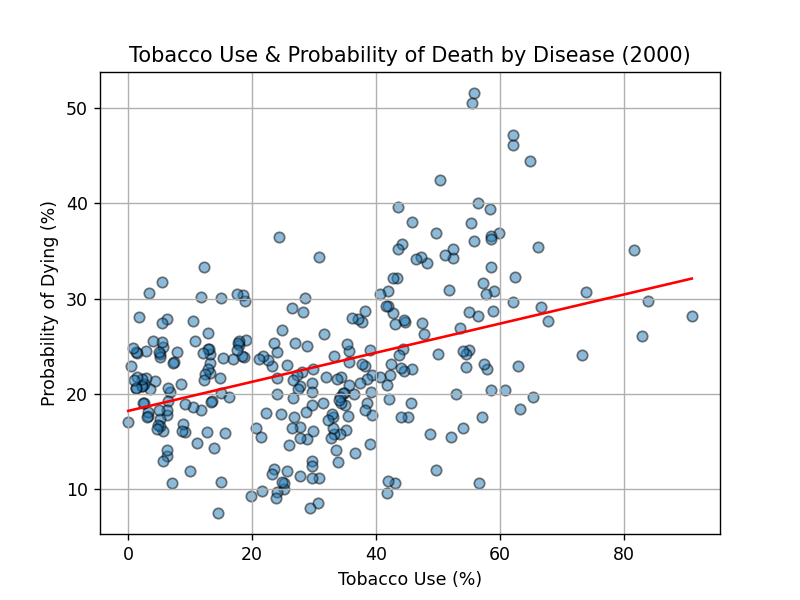

The correlation coefficient is 0.39.


In [114]:
x_values = cancer_tobacco2000_df["Tobacco Use (%)"]
y_values = cancer_tobacco2000_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2000)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2000.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    

In [76]:
cancer_tobacco2005_df = male_female_df[male_female_df.index == 2005]
cancer_tobacco2005_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2005,Timor-Leste,Male,25.6,85.7
2005,Myanmar,Male,27.8,79.7
2005,Lao People's Democratic Republic,Male,30.1,78.3
2005,Kiribati,Male,35.0,77.8
2005,Indonesia,Male,30.4,67.7
...,...,...,...,...
2005,Ghana,Female,23.1,0.9
2005,Egypt,Female,23.2,0.8
2005,Eritrea,Female,24.4,0.6


<IPython.core.display.Javascript object>


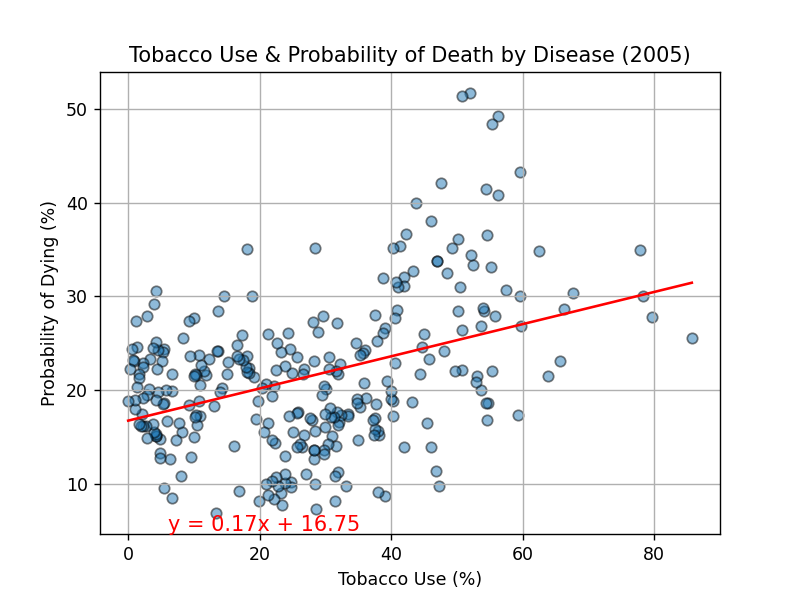

The correlation coefficient is 0.39.


In [115]:
x_values = cancer_tobacco2005_df["Tobacco Use (%)"]
y_values = cancer_tobacco2005_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2005)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2005.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    

In [54]:
cancer_tobacco2010_df = male_female_df[male_female_df.index == 2010]
cancer_tobacco2010_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Timor-Leste,Male,24.9,78.0
2010,Myanmar,Male,27.7,76.1
2010,Kiribati,Male,34.6,73.7
2010,Lao People's Democratic Republic,Male,29.7,71.0
2010,Indonesia,Male,30.7,68.7
...,...,...,...,...
2010,Ghana,Female,23.0,0.6
2010,Egypt,Female,24.1,0.6
2010,Eritrea,Female,24.0,0.5


<IPython.core.display.Javascript object>


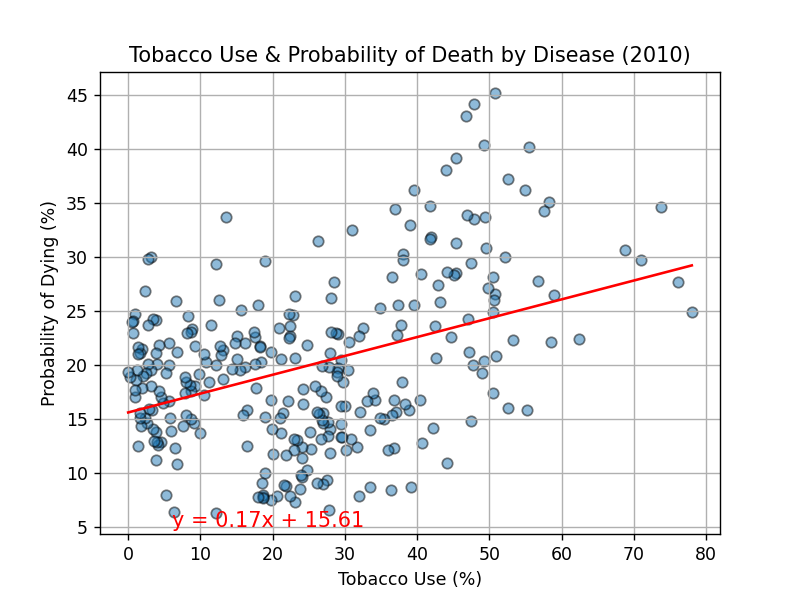

The correlation coefficient is 0.4.


In [116]:
# graph prevalence of tobacco vs. 30-70 cancer, etc deaths

x_values = cancer_tobacco2010_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")
    
# plot_linear_regression(cancer_tobacco2010_df["Tobacco Use (%)"], cancer_tobacco2010_df["Probability of Dying (%)"], "Tobacco Use & Probability of Death by Disease (2010)","Tobacco Use (%)", "Probability of Dying (%)" )
# correlation(cancer_tobacco2010_df["Tobacco Use (%)"], cancer_tobacco2010_df["Probability of Dying (%)"])

In [56]:
# Cancer vs. Tobacco 2010 (M)

cancer_tobacco2010m_df = cancer_tobacco2010_df[cancer_tobacco2010_df.Gender == 'Male']

cancer_tobacco2010m_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Timor-Leste,Male,24.9,78.0
2010,Myanmar,Male,27.7,76.1
2010,Kiribati,Male,34.6,73.7
2010,Lao People's Democratic Republic,Male,29.7,71.0
2010,Indonesia,Male,30.7,68.7
...,...,...,...,...
2010,Dominican Republic,Male,22.0,14.8
2010,Nigeria,Male,21.0,10.5
2010,Ethiopia,Male,19.2,9.8


In [57]:
# Cancer vs Tobacco 2010 (M) Scatterplot & Linear Regression, Correlation

x_values = cancer_tobacco2010m_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010m_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010, M)"
x_label = "Tobacco Use (%, M)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (45,12), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('male_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

<IPython.core.display.Javascript object>

The correlation coefficient is 0.48.


In [58]:
# Cancer vs. Tobacco 2010 (F)

cancer_tobacco2010f_df = cancer_tobacco2010_df[cancer_tobacco2010_df.Gender == 'Female']

cancer_tobacco2010f_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2010,Chile,Female,10.9,44.1
2010,Kiribati,Female,23.6,42.5
2010,Serbia,Female,16.8,40.4
2010,Sweden,Female,8.7,39.1
2010,Bulgaria,Female,16.8,36.8
...,...,...,...,...
2010,Ghana,Female,23.0,0.6
2010,Egypt,Female,24.1,0.6
2010,Eritrea,Female,24.0,0.5


<IPython.core.display.Javascript object>


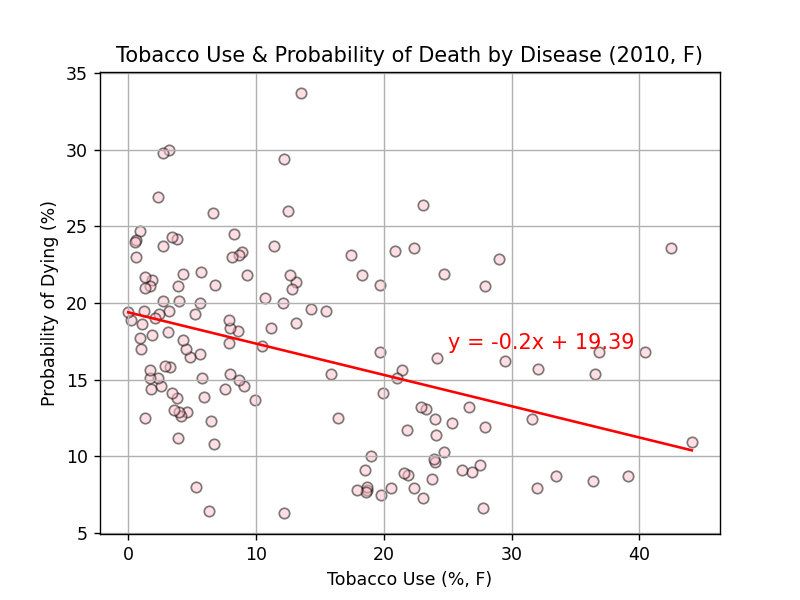

The correlation coefficient is -0.38.


In [117]:
# Cancer vs Tobacco 2010 (F) Scatterplot & Linear Regression, Correlation

x_values = cancer_tobacco2010f_df["Tobacco Use (%)"]
y_values = cancer_tobacco2010f_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2010, F)"
x_label = "Tobacco Use (%, F)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black", color = "pink")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (25,17), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('female_tobacco2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [78]:
cancer_tobacco2015_df = male_female_df[male_female_df.index == 2015]
cancer_tobacco2015_df

,Location,Gender,Probability of Dying (%),Tobacco Use (%)
Period,,,,
2015,Myanmar,Male,27.3,72.1
2015,Kiribati,Male,34.5,70.4
2015,Timor-Leste,Male,21.7,70.2
2015,Indonesia,Male,30.3,70.0
2015,Lao People's Democratic Republic,Male,29.2,63.8
...,...,...,...,...
2015,Ghana,Female,23.3,0.5
2015,Egypt,Female,24.3,0.5
2015,Eritrea,Female,22.9,0.4


<IPython.core.display.Javascript object>


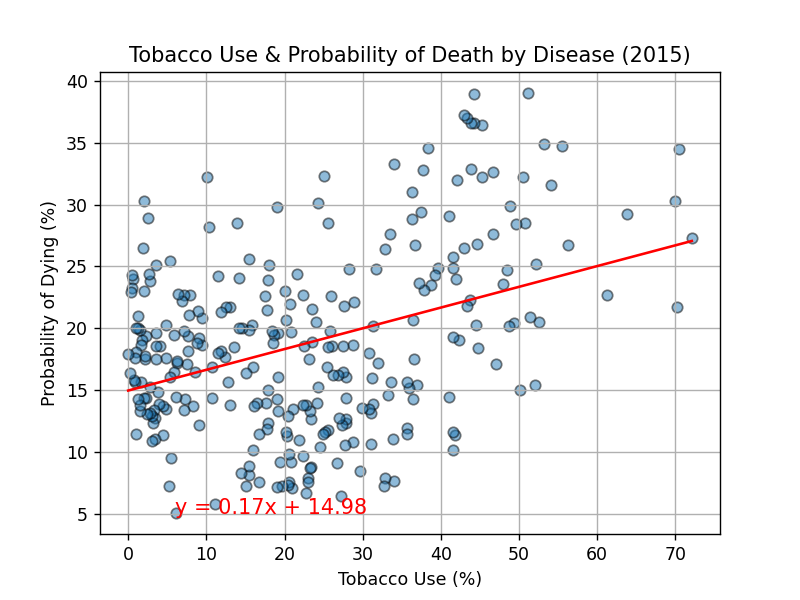

The correlation coefficient is 0.38.


In [118]:
x_values = cancer_tobacco2015_df["Tobacco Use (%)"]
y_values = cancer_tobacco2015_df["Probability of Dying (%)"]
title = "Tobacco Use & Probability of Death by Disease (2015)"
x_label = "Tobacco Use (%)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_tobacco2015.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [12]:
# Cancer vs. Alcohol
alcohol_df = alcohol_df.set_index(['Period'])

cancer_alcohol_df = pd.merge(cancer_etc_df, alcohol_df, on = ["Location", "Period", "Dim1"], how = "inner")
cancer_alcohol_df

cancer_alcohol_df = cancer_alcohol_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Alcohol per Capita',
    'Dim1': 'Gender'
})
cancer_alcohol_df

cancer_alcohol_df = cancer_alcohol_df.drop(columns = ["Indicator_x", "Indicator_y"])
both_sexes_alcohol = cancer_alcohol_df["Gender"] == "Both sexes"
both_sexes_alcohol

male_female_alcohol_df = cancer_alcohol_df[cancer_alcohol_df.Gender != 'Both sexes']
male_female_alcohol_df

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2015,Afghanistan,Male,31.9,0.350
2015,Afghanistan,Female,27.8,0.054
2010,Afghanistan,Male,34.1,0.360
2010,Afghanistan,Female,29.4,0.054
2015,Albania,Male,20.9,10.920
...,...,...,...,...
2010,Zimbabwe,Female,21.5,1.390
2005,Zimbabwe,Male,22.1,4.720
2005,Zimbabwe,Female,22.9,0.990


In [13]:
# sort by alcohol per capita
male_female_alcohol_df.sort_values(by=['Alcohol per Capita'], inplace=True, ascending=False)
male_female_alcohol_df

<ipython-input-13-9e947d927fdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_female_alcohol_df.sort_values(by=['Alcohol per Capita'], inplace=True, ascending=False)


,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2005,Republic of Moldova,Male,40.0,30.7400
2015,Seychelles,Male,28.8,28.5700
2005,Russian Federation,Male,51.4,28.5200
2010,Belarus,Male,45.2,27.6800
2000,Romania,Male,34.3,27.1300
...,...,...,...,...
2005,Kuwait,Female,18.6,0.0040
2015,Somalia,Female,22.1,0.0040
2015,Kuwait,Female,14.9,0.0006


In [72]:
# Cancer vs. Alcohol (2010) - Both sexes

cancer_alcohol2010_df = male_female_alcohol_df[male_female_alcohol_df.index == 2010]
cancer_alcohol2010_df


,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Male,45.2,27.680
2010,Russian Federation,Male,43.1,26.540
2010,Lithuania,Male,34.7,24.590
2010,Republic of Moldova,Male,38.1,24.360
2010,Montenegro,Male,28.1,23.920
...,...,...,...,...
2010,Bangladesh,Female,21.9,0.044
2010,Saudi Arabia,Female,15.9,0.038
2010,Libya,Female,16.6,0.025


<IPython.core.display.Javascript object>


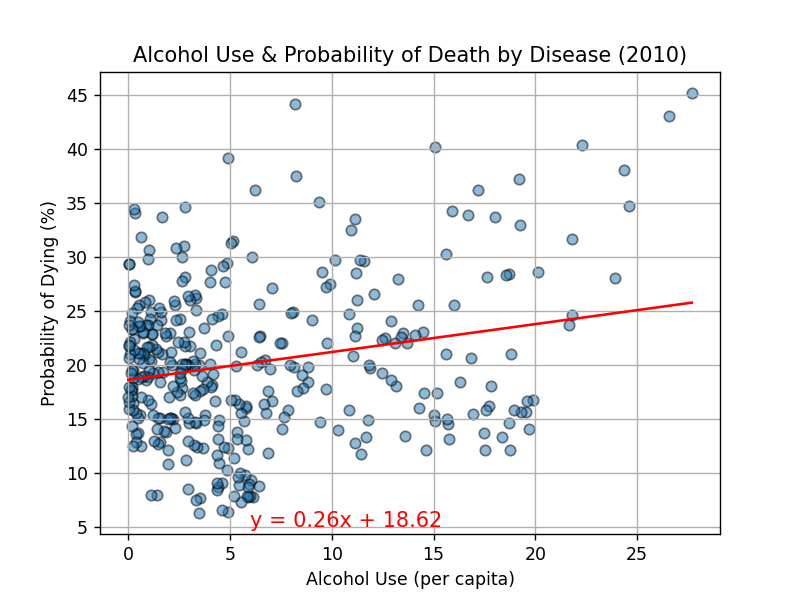

The correlation coefficient is 0.22.


In [119]:
x_values = cancer_alcohol2010_df["Alcohol per Capita"]
y_values = cancer_alcohol2010_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,5), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('both_sexes_alcohol2010.png')

plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [74]:
# Cancer vs. Alcohol 2010 (M)

cancer_alcohol2010m_df = cancer_alcohol2010_df[cancer_alcohol2010_df.Gender == 'Male']

cancer_alcohol2010m_df

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Male,45.2,27.680
2010,Russian Federation,Male,43.1,26.540
2010,Lithuania,Male,34.7,24.590
2010,Republic of Moldova,Male,38.1,24.360
2010,Montenegro,Male,28.1,23.920
...,...,...,...,...
2010,Bangladesh,Male,22.4,0.280
2010,Saudi Arabia,Male,19.5,0.260
2010,Libya,Male,24.8,0.170


<IPython.core.display.Javascript object>


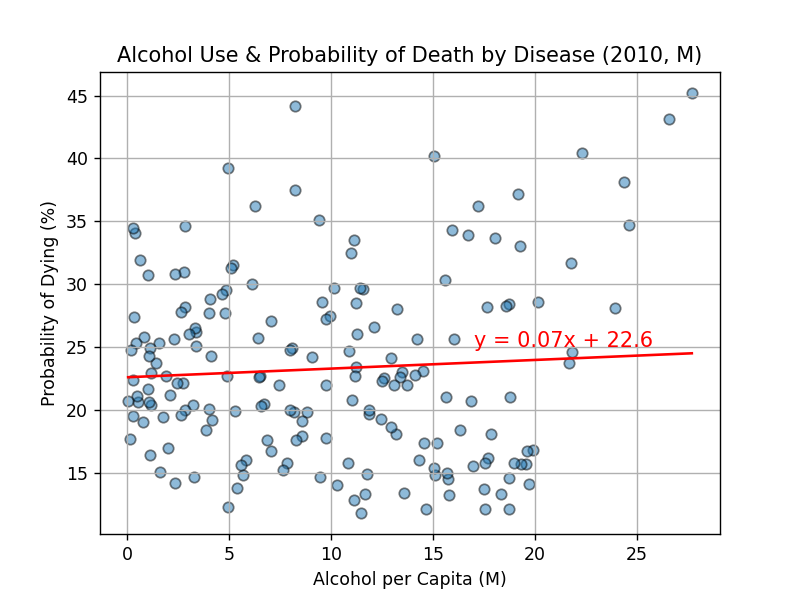

The correlation coefficient is 0.06.


In [120]:
# Cancer vs Alcohol 2010 (M) Scatterplot & Linear Regression, Correlation

x_values = cancer_alcohol2010m_df["Alcohol per Capita"]
y_values = cancer_alcohol2010m_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010, M)"
x_label = "Alcohol per Capita (M)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (17,25), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('male_alcohol2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [42]:
# Cancer vs. Alcohol 2010 (F)

cancer_alcohol2010f_df = cancer_alcohol2010_df[cancer_alcohol2010_df.Gender == 'Female']

cancer_alcohol2010f_df

,Location,Gender,Probability of Dying (%),Alcohol per Capita
Period,,,,
2010,Belarus,Female,18.4,8.830
2010,Republic of Moldova,Female,22.0,7.570
2010,Lithuania,Female,14.1,7.560
2010,Russian Federation,Female,19.6,6.960
2010,Czechia,Female,11.9,6.860
...,...,...,...,...
2010,Bangladesh,Female,21.9,0.044
2010,Saudi Arabia,Female,15.9,0.038
2010,Libya,Female,16.6,0.025


<IPython.core.display.Javascript object>


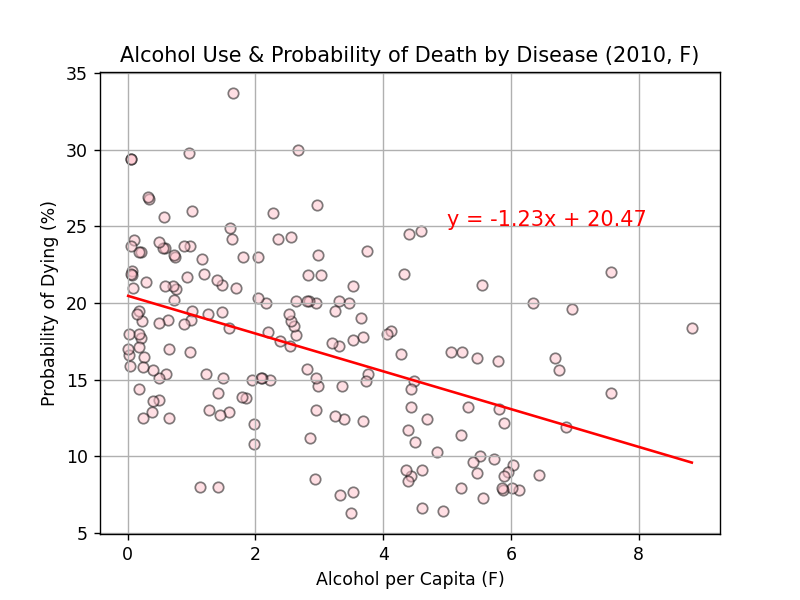

The correlation coefficient is -0.46.


In [121]:
# Cancer vs Alcohol 2010 (F) Scatterplot & Linear Regression, Correlation

x_values = cancer_alcohol2010f_df["Alcohol per Capita"]
y_values = cancer_alcohol2010f_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010, F)"
x_label = "Alcohol per Capita (F)"
y_label = "Probability of Dying (%)"

# def plot_linear_regression(x_values, y_values, title, x_label, y_label):
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values, marker = "o", alpha = 0.5, linewidth = 1, edgecolor = "black", color = "pink")
plt.plot(x_values, regress_values, "r-")
#plt.plot(line_eq)
plt.annotate(line_eq, (5,25), fontsize = 12, color = "red")
plt.grid(True)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)

plt.savefig('female_alcohol2010.png')

plt.show()

# def correlation(x_values, y_values):
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

In [19]:
doctors_df


,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41
...,...,...,...,...
2501,Zimbabwe,2005,"Medical doctors (per 10,000)",1.26
2502,Zimbabwe,2004,"Medical doctors (per 10,000)",1.74
2503,Zimbabwe,2000,"Medical doctors (per 10,000)",1.26
2504,Zimbabwe,1995,"Medical doctors (per 10,000)",1.43


In [20]:
# Cancer vs. Doctors

#doctors_df = doctors_df.set_index(["Period"])

cancer_doctors_df = pd.merge(cancer_etc_df, doctors_df, on = ["Location", "Period"], how = "inner")
cancer_doctors_df

cancer_doctors_df = cancer_doctors_df.rename(columns = {
    'First Tooltip_x': 'Probability of Dying (%)',
    'First Tooltip_y': 'Doctors (per 10,000)',
    'Dim1': 'Gender'
})
cancer_doctors_df

cancer_doctors_df = cancer_doctors_df.drop(columns = ["Indicator_x", "Indicator_y"])
both_sexes_doctors = cancer_doctors_df["Gender"] == "Both sexes"
both_sexes_doctors

male_female_doctors_df = cancer_doctors_df[cancer_doctors_df.Gender != 'Both sexes']


male_female_doctors_df = male_female_doctors_df.set_index(["Period"])
male_female_doctors_df


,Location,Gender,Probability of Dying (%),"Doctors (per 10,000)"
Period,,,,
2016,Afghanistan,Male,31.8,2.78
2016,Afghanistan,Female,27.7,2.78
2015,Afghanistan,Male,31.9,2.85
2015,Afghanistan,Female,27.8,2.85
2010,Afghanistan,Male,34.1,2.37
...,...,...,...,...
2010,Zimbabwe,Female,21.5,1.27
2005,Zimbabwe,Male,22.1,1.26
2005,Zimbabwe,Female,22.9,1.26


In [21]:
# sort by doctors per 10,000 people
male_female_doctors_df.sort_values(by=['Doctors (per 10,000)'], inplace=True, ascending=False)
male_female_doctors_df

,Location,Gender,Probability of Dying (%),"Doctors (per 10,000)"
Period,,,,
2016,Cuba,Male,19.0,79.54
2016,Cuba,Female,13.8,79.54
2015,Cuba,Female,14.0,77.69
2015,Cuba,Male,19.1,77.69
2010,Cuba,Female,15.1,68.15
...,...,...,...,...
2016,Malawi,Female,14.5,0.17
2016,United Republic of Tanzania,Male,18.5,0.14
2016,United Republic of Tanzania,Female,17.4,0.14


In [22]:
cancer_doctors2010_df = male_female_doctors_df[male_female_doctors_df.index == 2010]
cancer_doctors2010_df


,Location,Gender,Probability of Dying (%),"Doctors (per 10,000)"
Period,,,,
2010,Cuba,Female,15.1,68.15
2010,Cuba,Male,20.0,68.15
2010,Austria,Male,15.8,48.02
2010,Austria,Female,8.7,48.02
2010,Georgia,Female,16.7,44.47
...,...,...,...,...
2010,Burkina Faso,Female,21.8,0.46
2010,Liberia,Male,17.9,0.23
2010,Liberia,Female,18.1,0.23


In [23]:
x_values = cancer_doctors2010_df["Doctors (per 10,000)"]
y_values = cancer_doctors2010_df["Probability of Dying (%)"]
title = "Alcohol Use & Probability of Death by Disease (2010)"
x_label = "Alcohol Use (per capita)"
y_label = "Probability of Dying (%)"

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

The correlation coefficient is -0.24.


In [24]:
cancer_doctors2010_df1 = cancer_doctors2010_df.groupby(["Location"])
cancer_doctors2010_df1

In [ ]:
# import matplotlib.pyplot as plt


# def make_patch_spines_invisible(ax):
#     ax.set_frame_on(True)
#     ax.patch.set_visible(False)
#     for sp in ax.spines.values():
#         sp.set_visible(False)


# fig, host = plt.subplots()
# fig.subplots_adjust(right=0.75)

# par1 = host.twinx()
# par2 = host.twinx()

# # Offset the right spine of par2.  The ticks and label have already been
# # placed on the right by twinx above.
# par2.spines["right"].set_position(("axes", 1.2))
# # Having been created by twinx, par2 has its frame off, so the line of its
# # detached spine is invisible.  First, activate the frame but make the patch
# # and spines invisible.
# make_patch_spines_invisible(par2)
# # Second, show the right spine.
# par2.spines["right"].set_visible(True)

# p1, = host.plot([0, 1, 2], [0, 1, 2], "b-", label="Density")
# p2, = par1.plot([0, 1, 2], [0, 3, 2], "r-", label="Temperature")
# p3, = par2.plot([0, 1, 2], [50, 30, 15], "g-", label="Velocity")

# host.set_xlim(0, 2)
# host.set_ylim(0, 2)
# par1.set_ylim(0, 4)
# par2.set_ylim(1, 65)

# host.set_xlabel("Distance")
# host.set_ylabel("Density")
# par1.set_ylabel("Temperature")
# par2.set_ylabel("Velocity")

# host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
# par2.yaxis.label.set_color(p3.get_color())

# tkw = dict(size=4, width=1.5)
# host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# host.tick_params(axis='x', **tkw)

# lines = [p1, p2, p3]

# host.legend(lines, [l.get_label() for l in lines])

# plt.show()

In [92]:
tobacco_both_sexes = cancer_tobacco_df[cancer_tobacco_df.Gender == 'Both sexes']
alcohol_both_sexes = cancer_alcohol_df[cancer_alcohol_df.Gender == 'Both sexes']

summary_df = pd.merge(tobacco_both_sexes, alcohol_both_sexes, on = ["Location", "Period"], how = "inner")
summary_df

summary_df = summary_df[["Location", "Gender_x", "Probability of Dying (%)_x", "Tobacco Use (%)", "Alcohol per Capita"]]
summary_df

summary_df = summary_df.rename(columns = {
    'Gender_x': 'Gender',
    'Probability of Dying (%)_x': 'Probability of Death (%)'
})
summary_df

,Location,Gender,Probability of Death (%),Tobacco Use (%),Alcohol per Capita
Period,,,,,
2015,Albania,Both sexes,17.4,29.9,6.74
2010,Albania,Both sexes,18.6,31.1,7.69
2005,Albania,Both sexes,18.8,32.7,7.65
2000,Albania,Both sexes,19.4,34.2,6.57
2015,Algeria,Both sexes,14.4,19.3,0.93
...,...,...,...,...,...
2000,Zambia,Both sexes,23.2,19.9,4.05
2015,Zimbabwe,Both sexes,19.4,14.5,4.92
2010,Zimbabwe,Both sexes,21.1,15.6,3.93


In [96]:
summary_means_df = summary_df.groupby('Period').mean()
summary_means_df

,Probability of Death (%),Tobacco Use (%),Alcohol per Capita
Period,,,
2000,22.774648,30.236620,6.469387
2005,21.383099,27.248592,6.523725
2010,19.858333,24.847917,6.503486
2015,18.688889,22.775000,6.492007


In [113]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt


fig = plt.figure()

host = HostAxes(fig, [0.10, 0.09, 0.60, 0.75])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)

par1.axis["right"].set_visible(True)
par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.axis["right2"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

fig.add_axes(host)

p1, = host.plot([2000, 2005, 2010, 2015], summary_means_df['Probability of Death (%)'], label="Probability of Death (%)")
p2, = par1.plot([2000, 2005, 2010, 2015], summary_means_df['Alcohol per Capita'], label="Alcohol per Capita")
p3, = par2.plot([2000, 2005, 2010, 2015], summary_means_df['Tobacco Use (%)'], label="Tobacco Use (%)")

host.set_xlim(2000, 2015)
host.set_ylim(0, 100)
par1.set_ylim(6.25, 6.75)
par2.set_ylim(0, 100)

host.set_xlabel("Year")
host.set_ylabel("Probability of Death (%)")
par1.set_ylabel("Alcohol Use per Capita")
par2.set_ylabel("Tobacco Use (%)")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.savefig('yearwise_global.png')

plt.show()

<IPython.core.display.Javascript object>